## Qiskit 102 : Building a Qiskit pattern workflow

## Quantum Approximation Optimization Algorithm

In [28]:
import rustworkx as rx
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.circuit.library import RZZGate, RXGate
def max_cut_hamiltonian(graph: rx.PyGraph)-> SparsePauliOp:
    terms= [["",[],0.5*graph.num_edges()]]
    for edge in graph.edge_list():
        terms.append(["ZZ",edge, -0.5])
    return SparsePauliOp.from_sparse_list(terms, num_qubits=graph.num_nodes())

def qaoa_circuit(graph: rx.PyGraph, p:int)-> QuantumCircuit:
    betas  = [Parameter(f"b_{i}") for i in range(p)]
    gammas = [Parameter(f"g_{i}") for i in range(p)]
    qubits = QuantumRegister(graph.num_nodes())
    circuit = QuantumCircuit(qubits)
    circuit.h(qubits)
    for beta, gamma in zip(betas, gammas):
        for (i,j) in graph.edge_list():
            circuit.append(RZZGate(gamma), [qubits[i],qubits[j]])
        for q in qubits :
            circuit.append(RXGate(beta),[q])
    return circuit

In [29]:
n_qbits=5
probability = 0.8
p =1
graph = rx.undirected_gnp_random_graph(num_nodes=n_qbits,probability=probability)
observable = max_cut_hamiltonian(graph)
circuit = qaoa_circuit(graph, p=p)

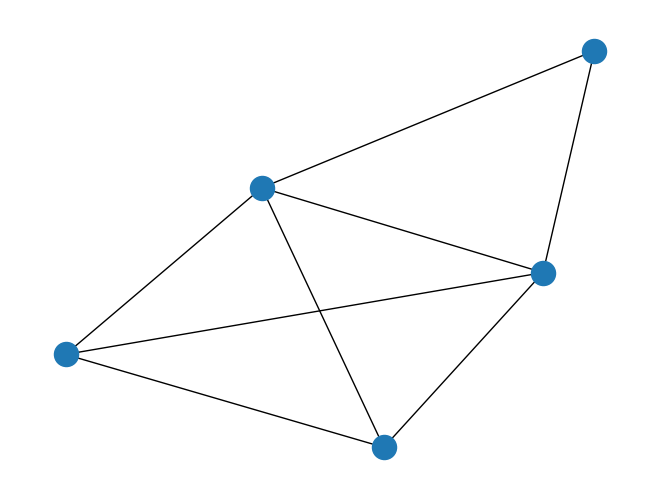

In [30]:
from rustworkx.visualization import mpl_draw
mpl_draw(graph)

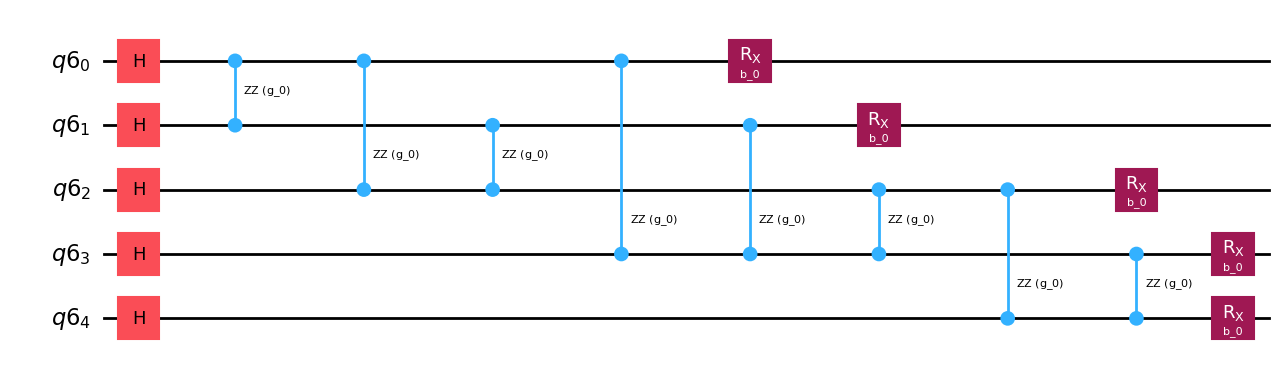

In [33]:
circuit.draw("mpl")

## Step 2: Optimize Problem for execution on quantum hardware